In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
baseball = pd.read_csv("/Users/rio512hsu/Downloads/baseball.csv")

In [3]:
baseball.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,244.000000,244.000000,1232.000000,420.000000,420.000000
mean,1988.957792,715.081981,715.081981,80.904221,0.326331,0.397342,0.259273,0.198052,3.122951,2.717213,161.918831,0.332264,0.419743
std,14.819625,91.534294,93.079933,11.458139,0.015013,0.033267,0.012907,0.398693,1.738349,1.095234,0.624365,0.015295,0.026510
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.294000,0.346000
25%,1976.750000,652.000000,649.750000,73.000000,0.317000,0.375000,0.251000,0.000000,2.000000,2.000000,162.000000,0.321000,0.401000
50%,1989.000000,711.000000,709.000000,81.000000,0.326000,0.396000,0.260000,0.000000,3.000000,3.000000,162.000000,0.331000,0.419000
75%,2002.000000,775.000000,774.250000,89.000000,0.337000,0.421000,0.268000,0.000000,4.000000,4.000000,162.000000,0.343000,0.438000
max,2012.000000,1009.000000,1103.000000,116.000000,0.373000,0.491000,0.294000,1.000000,8.000000,5.000000,165.000000,0.384000,0.499000


In [13]:
moneyball = baseball[baseball['Year'] < 2002].copy()

In [14]:
moneyball.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,154.000000,154.000000,902.000000,90.000000,90.000000
mean,1982.356984,703.809313,703.809313,80.881375,0.324961,0.390412,0.258153,0.170732,2.792208,2.454545,161.906874,0.340478,0.432500
std,11.556504,93.314579,93.784100,11.403424,0.015391,0.033110,0.013266,0.376483,1.557924,1.016793,0.702127,0.015416,0.025658
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.301000,0.377000
25%,1973.000000,641.250000,640.000000,73.000000,0.314000,0.368000,0.250000,0.000000,2.000000,2.000000,162.000000,0.329000,0.416000
50%,1983.000000,695.000000,697.000000,81.000000,0.324000,0.388000,0.258000,0.000000,2.500000,3.000000,162.000000,0.342000,0.432500
75%,1992.000000,761.750000,763.000000,89.000000,0.335000,0.411750,0.267000,0.000000,4.000000,3.000000,162.000000,0.350000,0.450750
max,2001.000000,1009.000000,1103.000000,116.000000,0.373000,0.485000,0.294000,1.000000,8.000000,4.000000,165.000000,0.384000,0.499000


In [15]:
moneyball['RD'] = (moneyball['RS'] - moneyball['RA'])

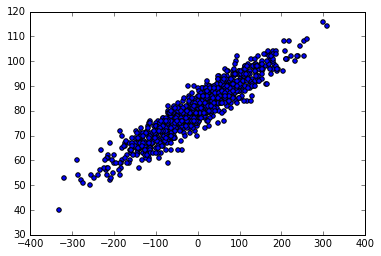

In [16]:
plt.scatter(moneyball['RD'], moneyball['W'])

In [17]:
import statsmodels.formula.api as sm

In [19]:
model = sm.ols(formula="W ~ RD", data=moneyball).fit()

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Wed, 27 Apr 2016   Prob (F-statistic):               0.00
Time:                        12:54:09   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     80.8814      0.131    616.675      0.000        80.624    81.139
RD             0.1058      0.001     81.554      0.000         0.103     0.108
==============================================================================
Omnibus:                        5.788   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.736
Skew:                          -0.195   Prob(JB):                       0.0568
Kurtosis:                       3.033   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
baseball['RD'] = (baseball['RS'] - baseball['RA'])

In [41]:
new = pd.Series({'RD': 99})
model.predict(new)

array([ 91.35217135])